In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras # to build Neural Network

2023-04-28 12:03:33.014032: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 12:03:33.204933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:03:33.732150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras 

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

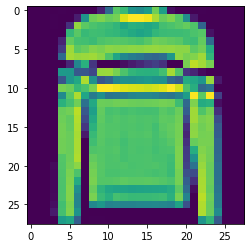

In [7]:
plt.imshow(X_train[5])

In [52]:
X_train[0] 

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00784314],
        [0.        ],
        [0.        ],
        [0.20784314],
        [0.31764706],
        [0.36862745],
        [0.48235294],
        [0.23137255],
        [0.        ],
        [0.        ],
        [0.01568627],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01176471],
        [0.        ],
        [0.02352941],
        [0.41176471],
        [0.29803922],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.49411765],
        [0.95294118],
        [0.07058824],
        

In [10]:
y_train[0]

9

In [11]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train.ndim

3

In [14]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [15]:
X_train.ndim

4

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.3, random_state=2023)
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((29400, 28, 28, 1), (29400,), (12600, 28, 28, 1), (12600,))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [27]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.6335 - accuracy: 0.7666 - val_loss: 0.4207 - val_accuracy: 0.8403
Epoch 2/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.4128 - accuracy: 0.8500 - val_loss: 0.3597 - val_accuracy: 0.8682
Epoch 3/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.3653 - accuracy: 0.8671 - val_loss: 0.3730 - val_accuracy: 0.8667
Epoch 4/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.3239 - accuracy: 0.8827 - val_loss: 0.3271 - val_accuracy: 0.8814
Epoch 5/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.8908 - val_loss: 0.2996 - val_accuracy: 0.8891
Epoch 6/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8969 - val_loss: 0.3273 - val_accuracy: 0.8790
Epoch 7/10
1838/1838 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9045 - val_loss: 0.2895 - val_accuracy:

In [28]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [29]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 855us/step - loss: 0.3117 - accuracy: 0.8953


[0.3116963505744934, 0.8952999711036682]

<AxesSubplot:>

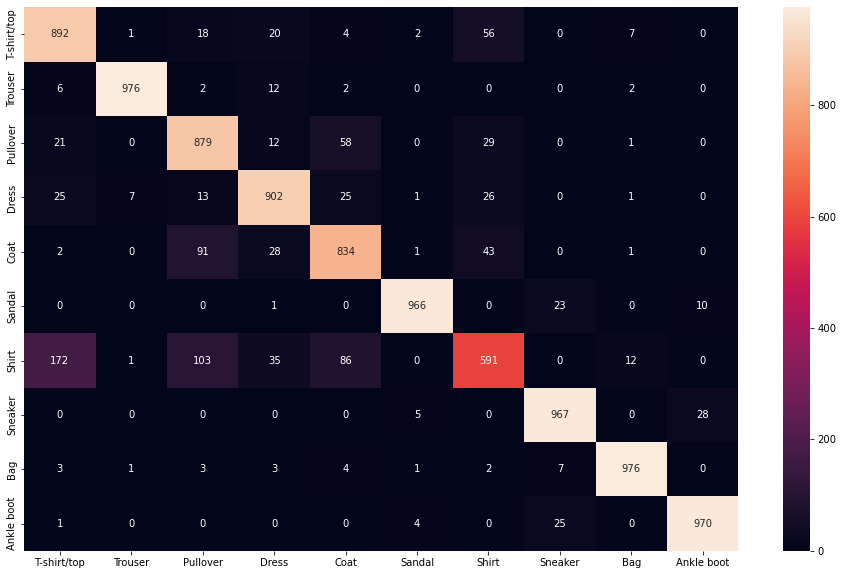

In [40]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,10))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [41]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.89      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.88      0.83      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.59      0.68      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [42]:
cnn_model.save('fashion_mnist_cnn_model.h5')
     

In [43]:
fashion_mnist_cnn_model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')

In [48]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
np.argmax(Y_pred_sample[0])
     

1/1 [==============================] - 0s 10ms/step


9

In [51]:
y_test[4]

6